#### **Instalando Soapy e suas dependências no Google Colab:**

In [ ]:
pip install numpy scipy astropy pyfftw pyyaml numba pyfits aotools PyQt5 pyqtgraph matplotlib ipython soapy plotly

#### **Importando exemplos do repositório do github do Soapy:**

In [2]:
! git clone https://github.com/AOtools/soapy/

Cloning into 'soapy'...
remote: Enumerating objects: 197, done.
remote: Counting objects: 100% (197/197), done.
remote: Compressing objects: 100% (148/148), done.
remote: Total 7737 (delta 123), reused 94 (delta 47), pack-reused 7540
Receiving objects: 100% (7737/7737), 3.11 MiB | 11.92 MiB/s, done.
Resolving deltas: 100% (5419/5419), done.


#### **Rodando uma simulação:**

In [11]:
import soapy

# Inicia uma instancia de simulação do Soapy e passa um arquivo de configuração .yaml
simulacao = soapy.Sim('/content/soapy/conf/sh_8x8.yaml')

# Atribuição programática de parametros
simulacao.config.sim.simName   = 'IC_FIS_UTFPR'
simulacao.config.sim.verbosity = 0
simulacao.config.sim.nIters    = 500

# Parametros de salvamento de dados
simulacao.config.sim.saveSlopes        = True
simulacao.config.sim.saveDmCommands    = True
simulacao.config.sim.saveWfsFrames     = True
simulacao.config.sim.saveStrehl        = True
simulacao.config.sim.saveWfe           = True
simulacao.config.sim.saveSciPsf        = True
simulacao.config.sim.saveInstPsf       = True
simulacao.config.sim.saveInstScieField = False
simulacao.config.sim.saveSciRes        = True


# Inicializa todos os componentes da simulação com base nos parametros informados
simulacao.aoinit()

# Calcula a Matriz de Interação
simulacao.makeIMat()

# Inicia a simulação
simulacao.aoloop()

2 of 2: Generating 2 Actuator DM iMat
81 of 81: Generating 81 Actuator DM iMat
500 of 500: IC_FIS_UTFPR  Strehl -- sci_0: inst 0.52, long 0.50 


Science Camera 0: Long Exposure Strehl Ratio: 0.50
                  EE50 diameter [mas]: 138


Time moving atmosphere: 3.45
Time making IMats and CMats: 2.33
Time in WFS: 18.78
	 of which time spent in : 0.00
Time in Reconstruction: 0.06
Time in DM: 0.72
Time making science image: 6.70




#### **Usando dados da simulação para plotar um gráfico de Strehl**

In [18]:
import plotly.graph_objects as go

# Dados para plotagem
strehl_instantaneo = simulacao.instStrehl[0]
strehl_longo = simulacao.longStrehl[0]
iteracoes = [ i for i in range(simulacao.config.sim.nIters) ]

# Rotulos do gráfico
simName = simulacao.config.sim.simName
titulo  = f'Simulação {simName} : Grafico de Strehl'
eixo_x  = 'Iterações'
eixo_y  = 'Valores de Strehl'
linha_1 = 'Strehl instantâneo'
linha_2 = 'Strehl de Longa Exposição'

# Plotando o gráfico
grafico = go.Figure()

grafico.update_layout(
    title=titulo, 
    xaxis_title=eixo_x, 
    yaxis_title=eixo_y, 
    width=800, height=400)

grafico.add_trace(
    go.Scatter(x=iteracoes, y=strehl_instantaneo, name = linha_1))

grafico.add_trace(
    go.Scatter(x=iteracoes, y=strehl_longo, name=linha_2))

grafico.show()

#### **Usando dados da simulação para plotar image da câmera científica:**

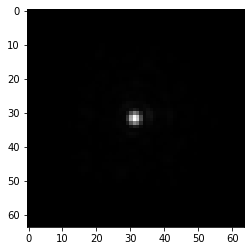

In [5]:
import matplotlib.pyplot as plt

camera_cientifica_pfs = simulacao.sciImgs[0]

plt.imshow(camera_cientifica_pfs, vmin=0, cmap='gray')

plt.show()

#### **Plotando residuos por iteração:**

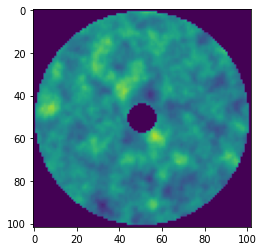

In [6]:
import matplotlib.pyplot as plt
from IPython import display

residuos = simulacao.sciPhase[0]

for residuo in residuos:
    plt.imshow(residuo, vmin=0, vmax=2000)  #(residuo, cmap='gray')
    display.display(plt.gcf())
    display.clear_output(wait=True)


#### **Abrindo imagens fits geradas pela simulação:**


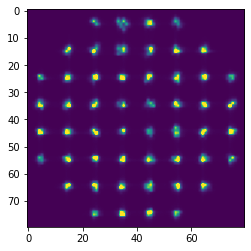

In [32]:
import matplotlib.pyplot as plt
from astropy.io import fits
from IPython import display
from glob import glob

# A cada execucao é criada uma nova pasta com dados
# Selecione a execucao correspondente para plotagem
numero_da_execucao = 1

path = f'/content/{simName}/'
subpaths = [f.path for f in os.scandir(path) if f.is_dir()]
diretorio = f'{subpastas[numero_da_execucao-1]}/wfsFPFrames/*.fits'    
arquivos = glob(diretorio)
frames = []
count = 0

for arquivo in arquivos:
    frames.append(fits.getdata(arquivo, ext=0))

for frame in frames:
    plt.imshow(frame, vmin=0, vmax=500)
    display.display(plt.gcf())
    display.clear_output(wait=True)


###### **Comando para apagar pasta da simulação:**

In [ ]:
!rm -rf simName